# Generate figures for PySM

This notebook generates some figures of Galactic and Extra-Galactic emissions using PySM. Mostly for displaying purposes.

This notebook is designed to work on Google Colab, remove the `apt` lines if executing locally but make sure you have a Latex environment.

In [ ]:
# Install Latex to render labels
!apt install texlive texlive-latex-extra texlive-fonts-recommended cm-super-minimal dvipng

In [ ]:
%pip install pysm3

In [3]:
import pysm3
from pysm3 import units as u
import healpy as hp

In [4]:
sky = pysm3.Sky(nside=128, preset_strings=["c3"], output_unit=u.uK_CMB)

In [5]:
cmb = sky.get_emission(100 * u.GHz)

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [7]:
fontsize={"title":30, "cbar_label":20, "cbar_tick_label":20}

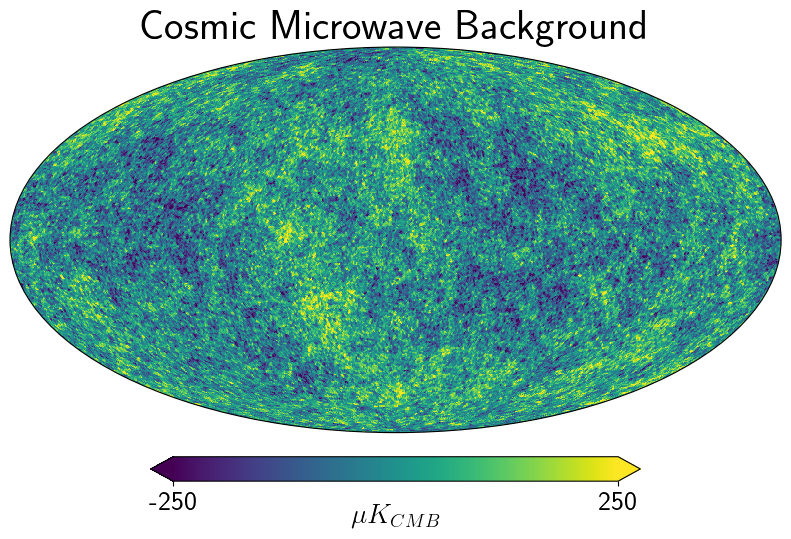

In [8]:
hp.projview(cmb[0].value, min=-250, max=250,
            fontsize=fontsize,
            unit=r'$\mu K_{CMB}$', title="Cosmic Microwave Background");
plt.savefig("1.jpg", bbox_inches="tight")

In [9]:
sky = pysm3.Sky(nside=256, preset_strings=["s5"], output_unit=u.mK_RJ)
sync = sky.get_emission(23 * u.GHz)[0]

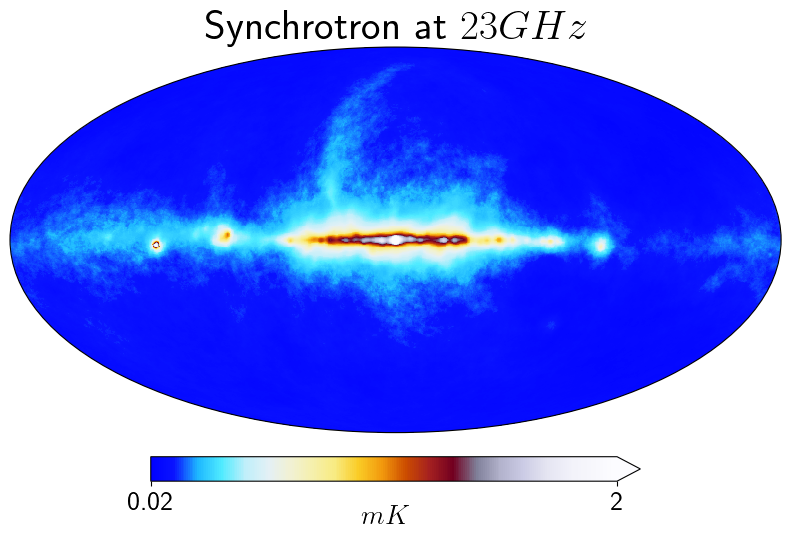

In [10]:
hp.projview(sync.value, min=0.02, max=2,
            fontsize=fontsize, norm="symlog2", cmap="planck_log",
            unit=r'$mK$', title=r"Synchrotron at $23 GHz$");
plt.savefig("2.jpg", bbox_inches="tight")

In [11]:
sky = pysm3.Sky(nside=256, preset_strings=["f1"], output_unit=u.mK_RJ)
freefree = sky.get_emission(30 * u.GHz)[0]

In [12]:
freefree.min(), freefree.max()

(<Quantity 1.9947761e-07 mK_RJ>, <Quantity 212.05362 mK_RJ>)

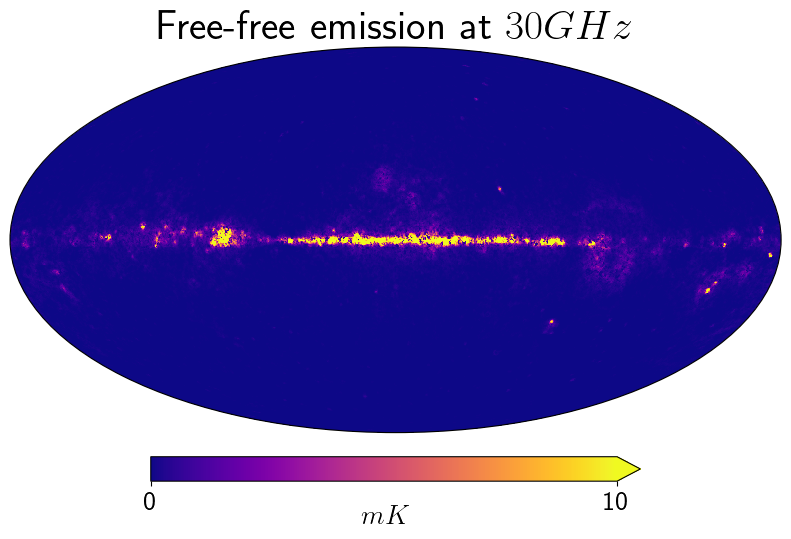

In [13]:
hp.projview(freefree.value, min=0, max=10,
            fontsize=fontsize,
            #norm="hist",
            cmap = "plasma",
            #norm="symlog2", cmap="planck_log",
            unit=r'$mK$', title=r"Free-free emission at $30 GHz$");


In [14]:
sky = pysm3.Sky(nside=256, preset_strings=["a1"], output_unit=u.mK_RJ)
ame = sky.get_emission(30 * u.GHz)[0]

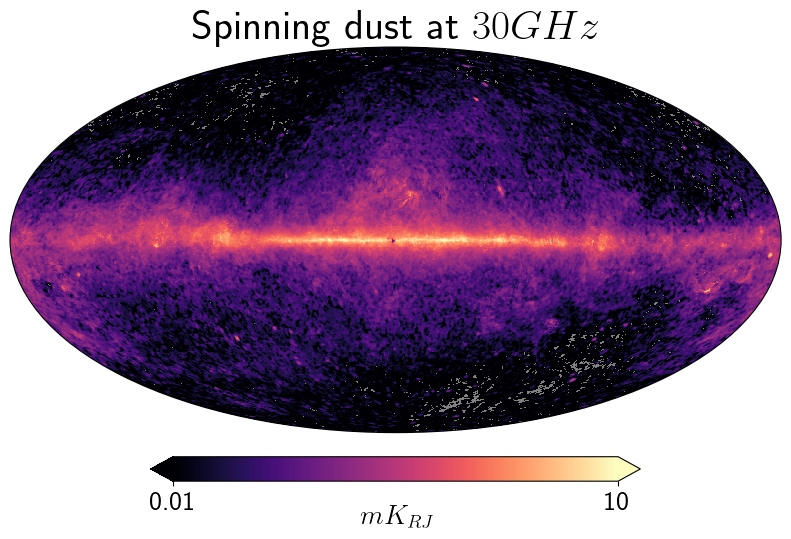

In [15]:
hp.projview(ame.value, min=0.01, max=10,
            fontsize=fontsize,
            norm="log",
            cmap = "magma",
            #norm="symlog2", cmap="planck_log",
            unit=r'$mK_{RJ}$', title=r"Spinning dust at $30 GHz$");
plt.savefig("3.jpg", bbox_inches="tight")

In [16]:
sky = pysm3.Sky(nside=256, preset_strings=["d10"], output_unit=u.mK_RJ)
dust = sky.get_emission(545 * u.GHz)[0]

In [17]:
dust.value.min()

0.03938505

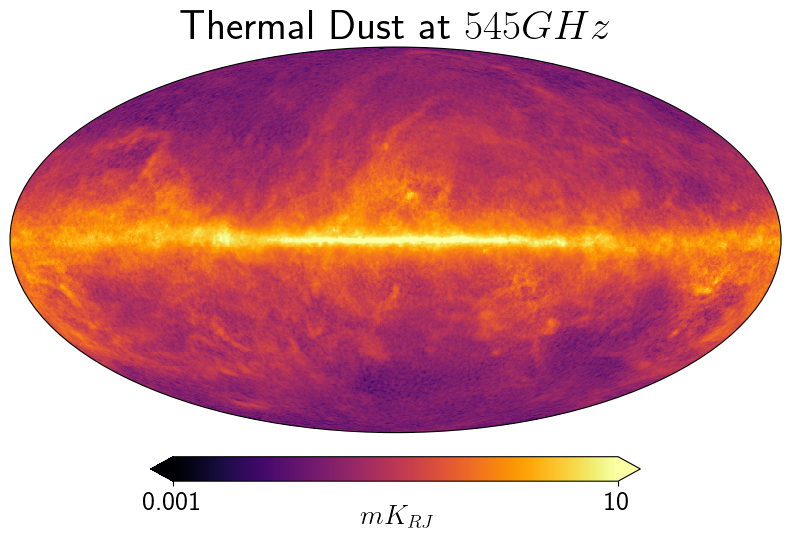

In [18]:
hp.projview(dust.value-dust.value.min(), min=0.001, max=10,
            fontsize=fontsize,
            norm="log",
            cmap = "inferno",
            #norm="symlog2", cmap="planck_log",
            unit=r'$mK_{RJ}$', title=r"Thermal Dust at $545 GHz$");
plt.savefig("4.jpg", bbox_inches="tight")

In [19]:
sky = pysm3.Sky(nside=256, preset_strings=["co1"], output_unit=u.mK_RJ)
co = sky.get_emission(sky.components[0].line_frequency['10'])[0]

In [20]:
c=sky.components[0]

In [21]:
c.line_frequency

{'10': <Quantity 115.271 GHz>,
 '21': <Quantity 230.538 GHz>,
 '32': <Quantity 345.796 GHz>}

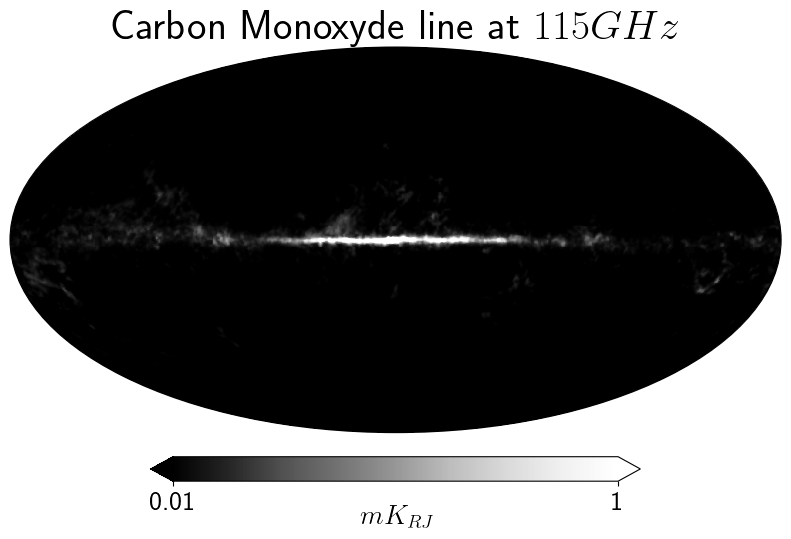

In [22]:
hp.projview(co.value, min=0.01, max=1,
            fontsize=fontsize,
            #norm="log",
            cmap = "Greys_r",
            #norm="symlog2", cmap="planck_log",
            unit=r'$mK_{RJ}$', title=r"Carbon Monoxyde line at $115 GHz$");
plt.savefig("5.jpg", bbox_inches="tight")

In [23]:
sky = pysm3.Sky(nside=2048, preset_strings=["rg1"], output_unit=u.uK_RJ)
rg = sky.get_emission(353*u.GHz)[0]

In [24]:
pysm3.apply_smoothing_and_coord_transform?

In [25]:
rg_smoothed = pysm3.apply_smoothing_and_coord_transform(rg, output_nside=256,

                                                        fwhm=3 * u.arcmin)

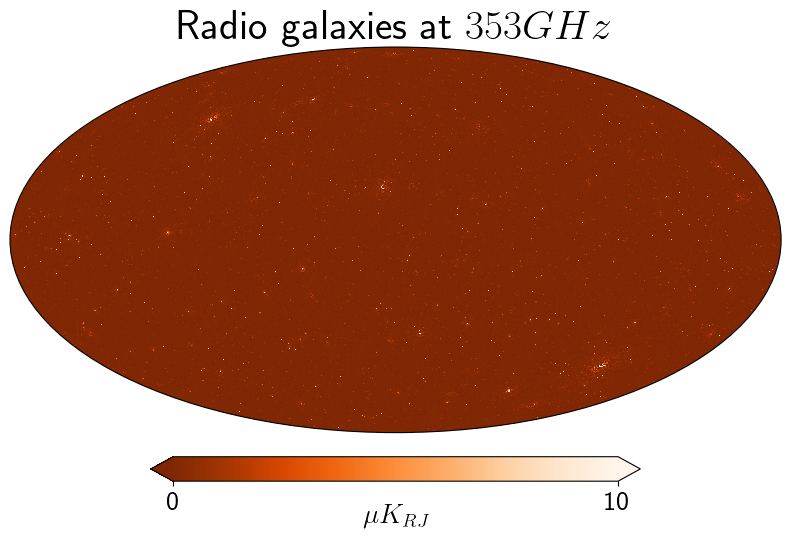

In [26]:
hp.projview(rg_smoothed.value, min=0, max=10,
            fontsize=fontsize,
            #norm="log",
            cmap = "Oranges_r",
            #norm="symlog2", cmap="planck_log",
            unit=r'$\mu K_{RJ}$', title=r"Radio galaxies at $353 GHz$");
plt.savefig("6.jpg", bbox_inches="tight")

In [27]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
imagemagick is already the newest version (8:6.9.11.60+dfsg-1.3ubuntu0.22.04.3).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [28]:
!rm -f montage.jpg
!montage -geometry -0+0 -size 2000 *.jpg montage.jpg

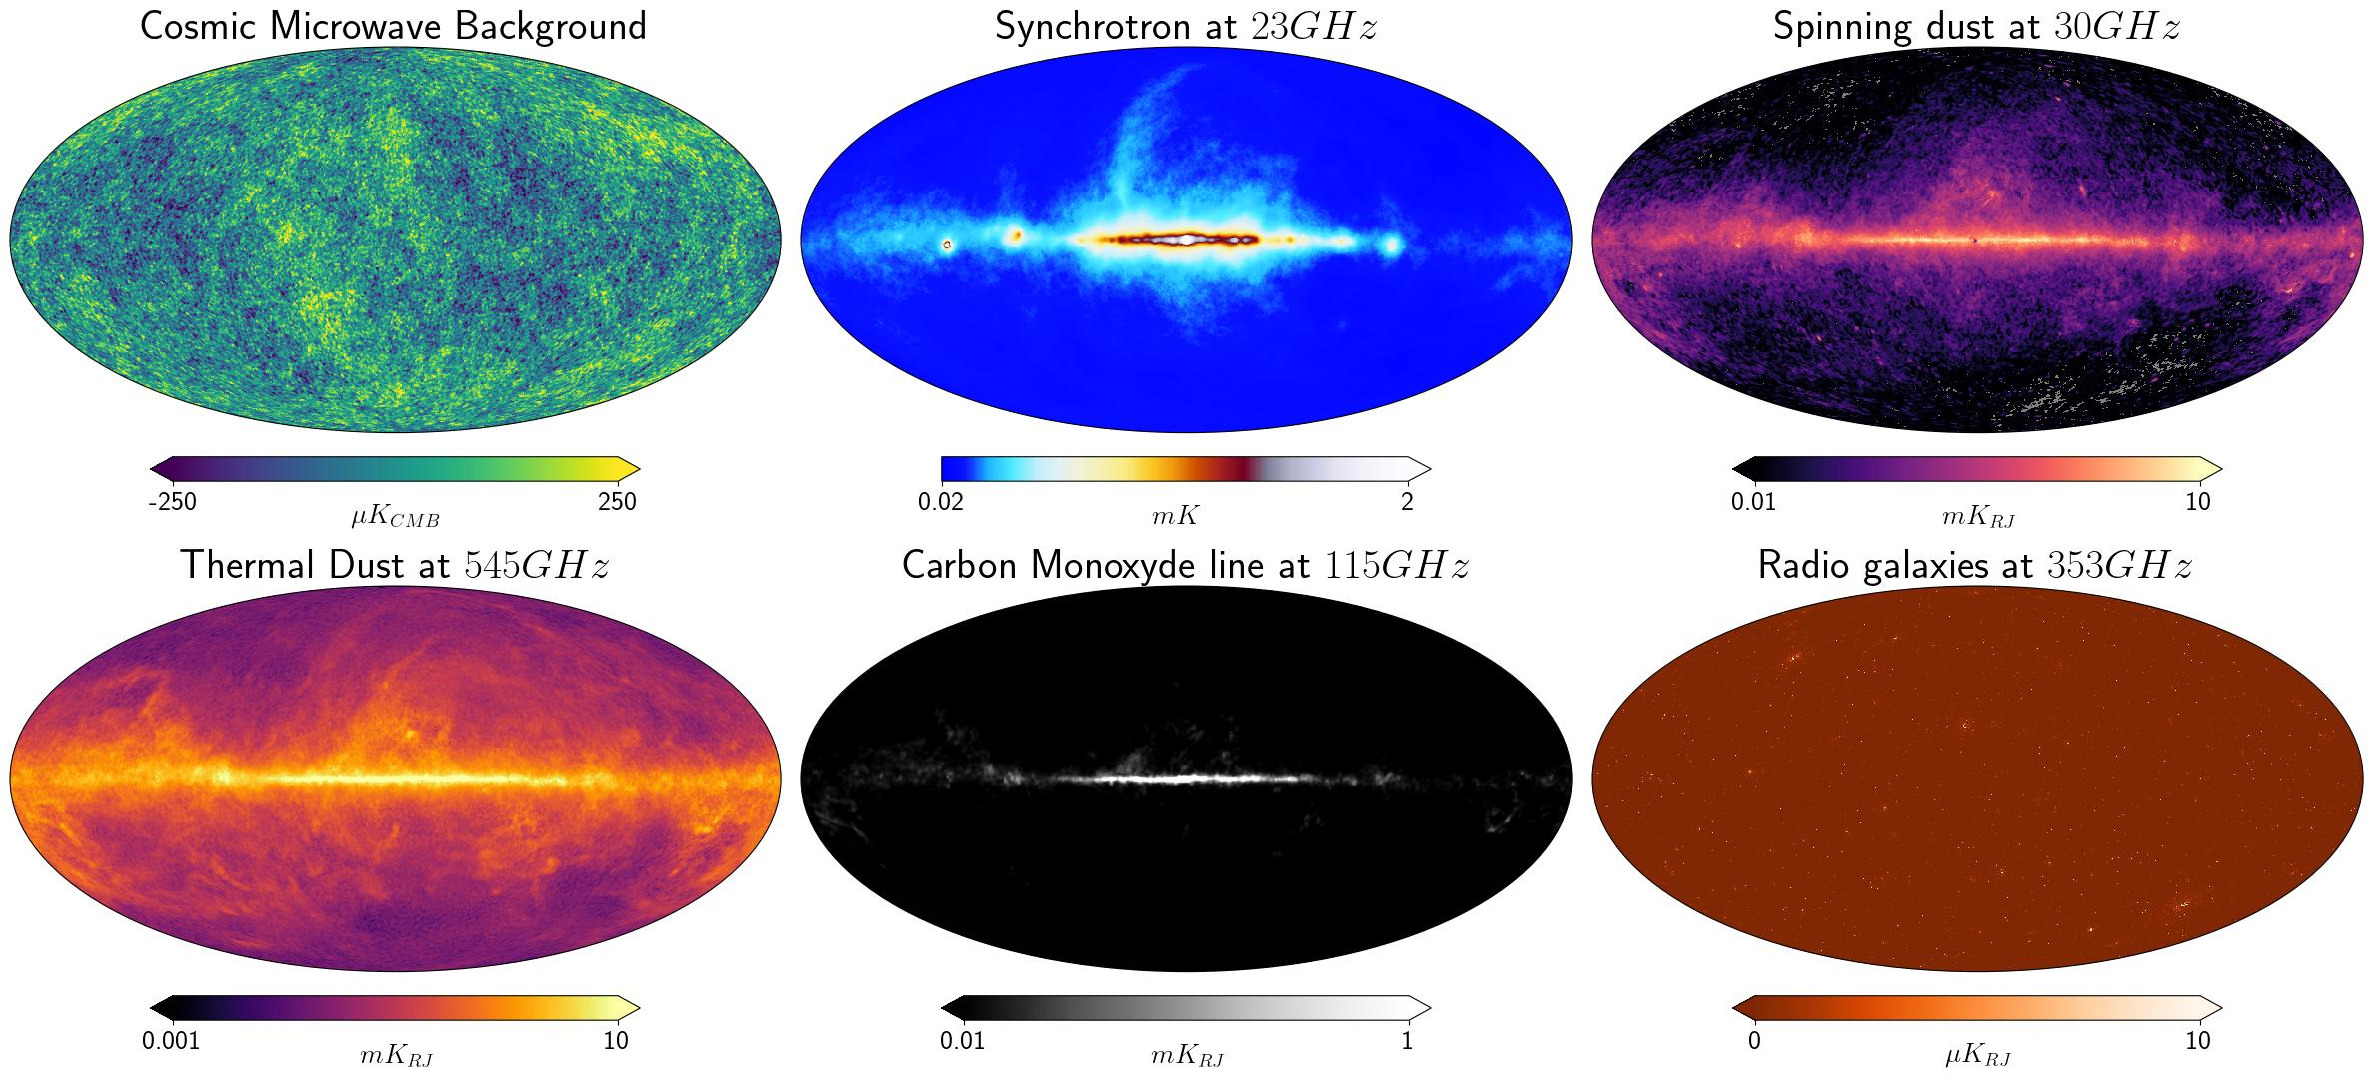

In [29]:
from IPython.display import Image
Image(filename='montage.jpg')